In [343]:
pip install fancyimpute

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [344]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt

In [345]:
traindata = pd.read_csv('trainTitanic.csv')
testdata = pd.read_csv('testTitanic.csv')

In [346]:
traindata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [347]:
testdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [348]:
traindata.shape

(8693, 14)

In [349]:
testdata.shape

(4277, 13)

In [350]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [351]:
traindata.isnull().sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

<AxesSubplot:>

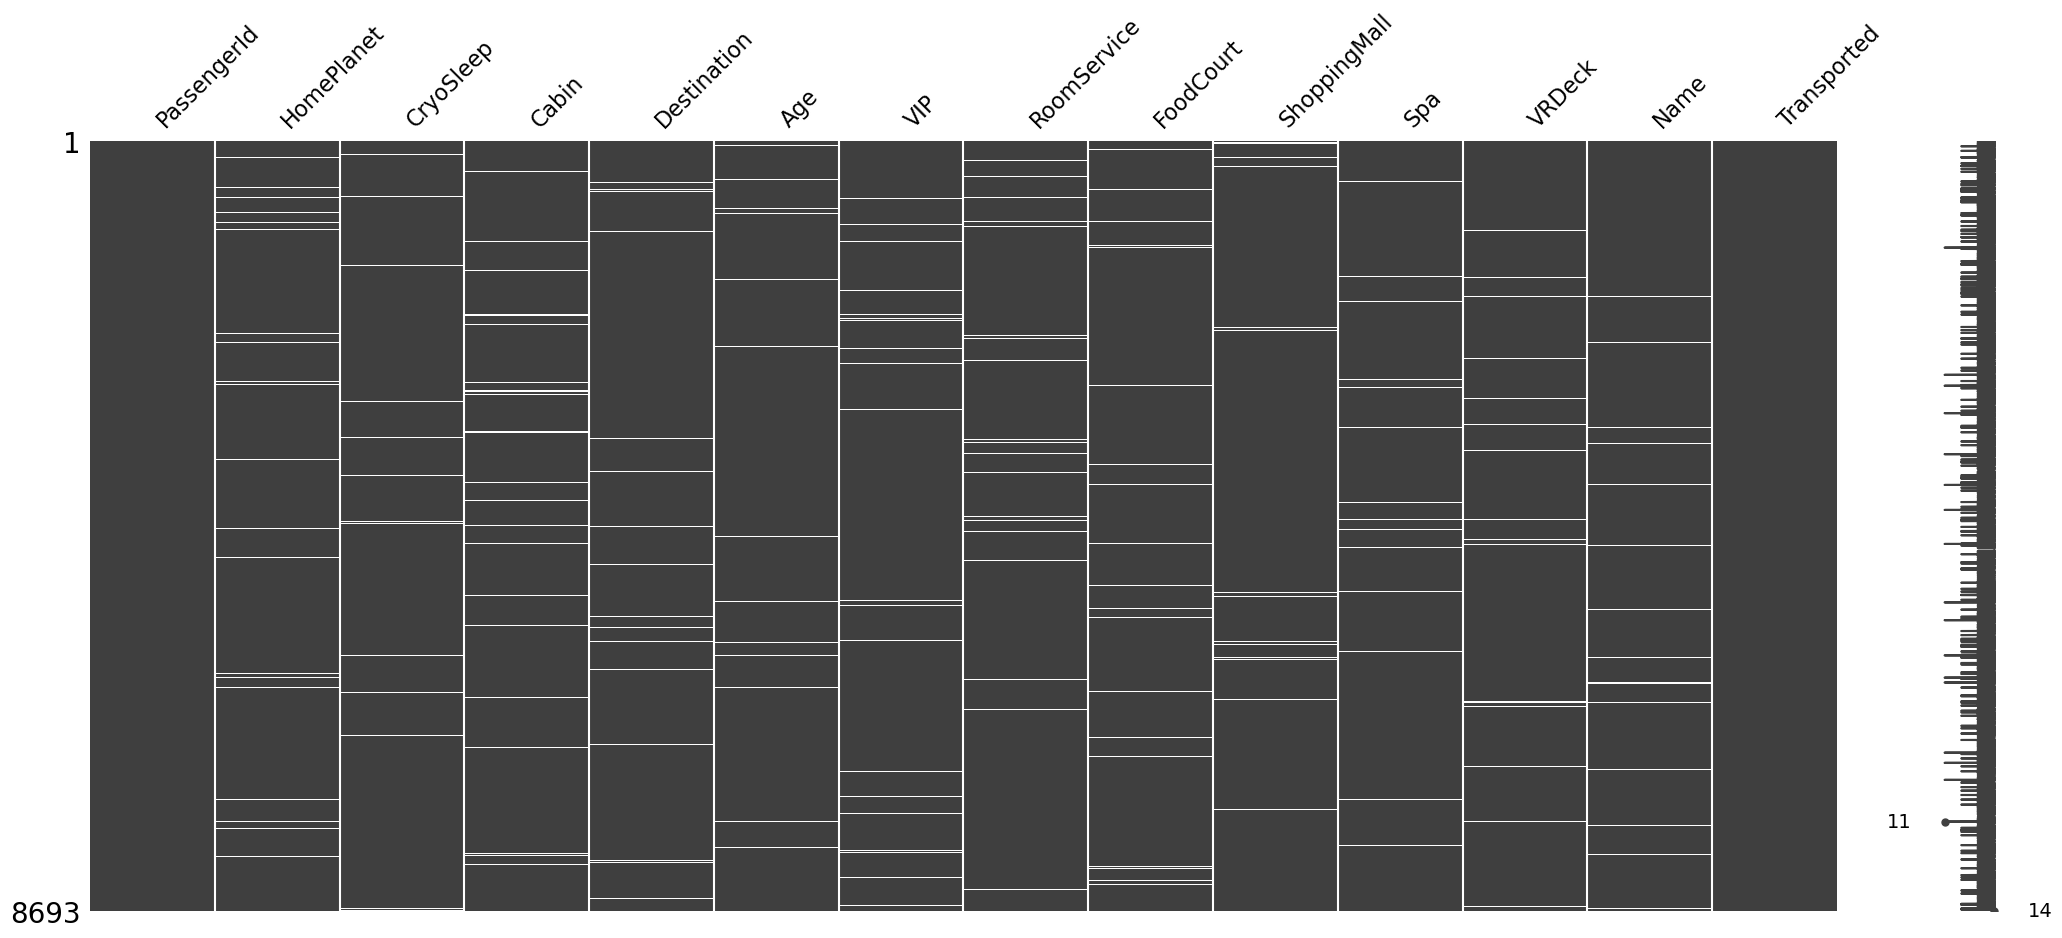

In [352]:
missingno.matrix(traindata)

In [353]:
unique_values = traindata.apply(pd.unique)
print(unique_values)

PassengerId     [0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ...
HomePlanet                             [Europa, Earth, Mars, nan]
CryoSleep                                      [False, True, nan]
Cabin           [B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0...
Destination        [TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]
Age             [39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28....
VIP                                            [False, True, nan]
RoomService     [0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71...
FoodCourt       [0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0...
ShoppingMall    [0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589....
Spa             [0.0, 549.0, 6715.0, 3329.0, 565.0, 291.0, 216...
VRDeck          [0.0, 44.0, 49.0, 193.0, 2.0, nan, 124.0, 113....
Name            [Maham Ofracculy, Juanna Vines, Altark Susent,...
Transported                                         [False, True]
dtype: object


In [354]:
# Identify categorical columns
categorical_columns = traindata.select_dtypes(include=['object']).columns
categorical_columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [355]:
numeric_columns = traindata.select_dtypes(include=['float64']).columns
numeric_columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [356]:
'''
for column in categorical_columns:
    traindata[column] = traindata[column].fillna(traindata[column].mode()[0])

for column in categorical_columns:
    print(column, traindata[column].isnull().sum())
    
for column in categorical_columns:
    testdata[column] = testdata[column].fillna(testdata[column].mode()[0])

for column in categorical_columns:
    print(column, testdata[column].isnull().sum())
'''
for column in categorical_columns:
    # Get the non-missing values in the column
    non_missing_values = traindata[column].dropna().unique()
    
    # Randomly sample from the non-missing values to replace missing values
    traindata[column] = traindata[column].apply(lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x)
    
for column in categorical_columns:
    print(column, traindata[column].isnull().sum())

for column in categorical_columns:
    # Get the non-missing values in the column
    non_missing_values = testdata[column].dropna().unique()
    
    # Randomly sample from the non-missing values to replace missing values
    testdata[column] = testdata[column].apply(lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x)
    
for column in categorical_columns:
    print(column, testdata[column].isnull().sum())

PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 0
PassengerId 0
HomePlanet 0
CryoSleep 0
Cabin 0
Destination 0
VIP 0
Name 0


In [357]:
for column1 in numeric_columns:
    traindata[column1] = traindata[column1].fillna(traindata[column1].median())
    
for column1 in numeric_columns:
    print(column1, traindata[column1].isnull().sum())
    
for column1 in numeric_columns:
    testdata[column1] = testdata[column1].fillna(testdata[column1].median())
    
for column1 in numeric_columns:
    print(column1, testdata[column1].isnull().sum())

Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0
Age 0
RoomService 0
FoodCourt 0
ShoppingMall 0
Spa 0
VRDeck 0


In [358]:
traindata.isnull().sum().sort_values(ascending = False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [359]:
testdata.isnull().sum().sort_values(ascending = False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [360]:
#Data Analysis
#for numerical variable
traindata.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [361]:
traindata.describe(include=['O',bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8693,8693,8693,8693,8693,8693,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Sharie Gallenry,True
freq,1,4674,5551,8,5981,8387,3,4378


In [362]:
traindata.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8693,8693,8693,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Sharie Gallenry,True
freq,1,4674,5551,8,5981,NaN,8387,NaN,NaN,NaN,NaN,NaN,3,4378
mean,NaN,NaN,NaN,NaN,NaN,28.790291,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.341404,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,NaN


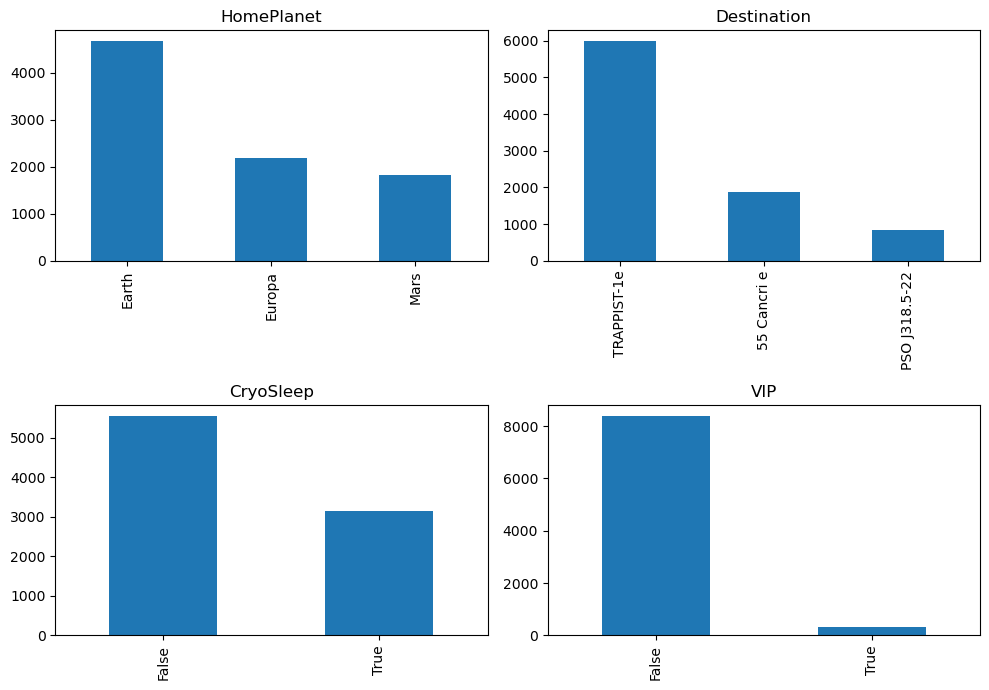

In [363]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
traindata['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
traindata['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
traindata['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
traindata['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();


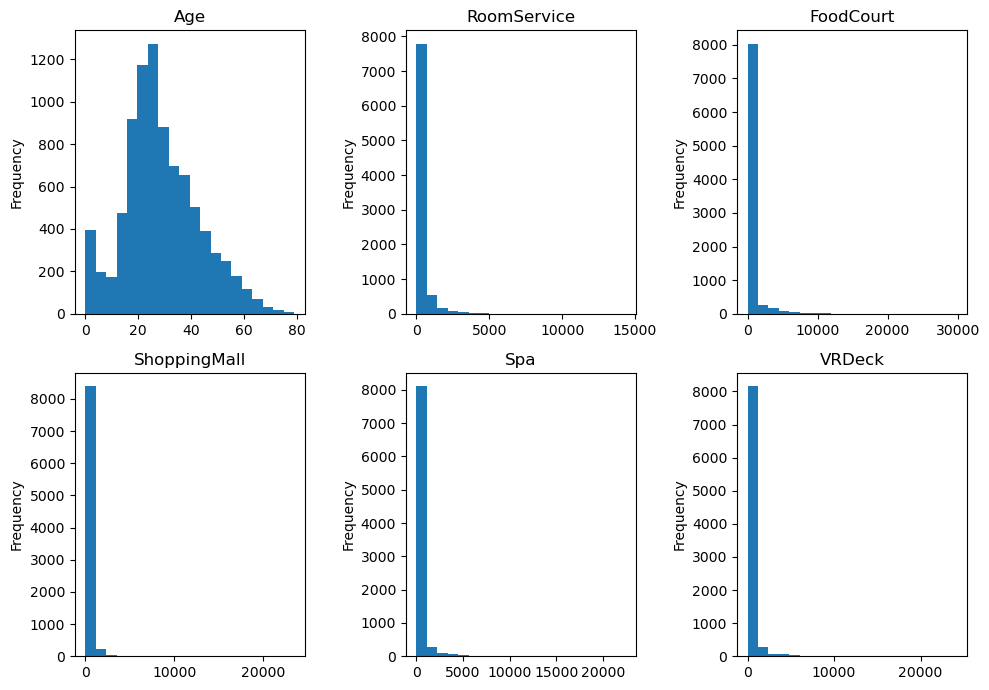

In [364]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numeric_columns):
    plt.subplot(2,3,i+1)
    traindata[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

In [365]:
#feature engineering
# Create a new 'Deck' column by extracting the deck information from the 'Cabin' column
traindata['Deck'] = traindata['Cabin'].str[0]
testdata['Deck'] = testdata['Cabin'].str[0]


# Create a new 'Port' column by extracting the port information from the 'Cabin' column
traindata['Port'] = traindata['Cabin'].str[-1]
testdata['Port'] = testdata['Cabin'].str[-1]
traindata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


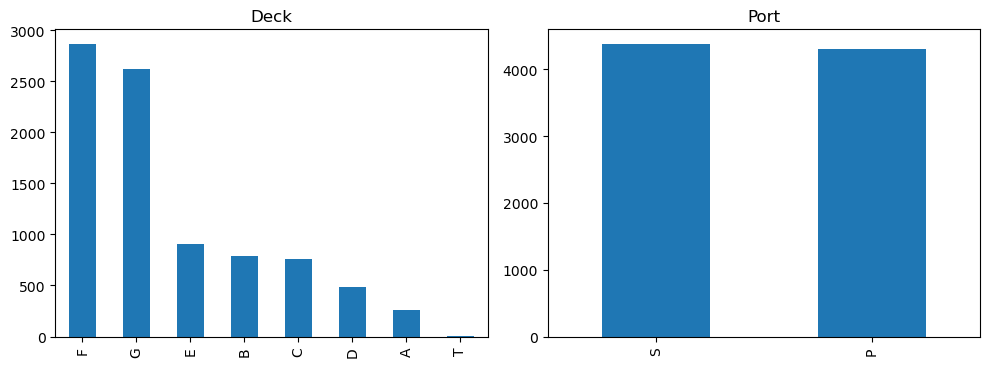

In [366]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
traindata['Deck'].value_counts().plot(kind='bar', title='Deck')
plt.subplot(2,2,2)
traindata['Port'].value_counts().plot(kind='bar', title='Port')
plt.tight_layout();

In [367]:
traindata["Deck"] = traindata["Deck"].map({'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7})
testdata["Deck"] = testdata["Deck"].map({'B': 0, 'F': 1, 'A': 2, 'G': 3, 'E': 4, 'D': 5, 'C': 6, 'T': 7})
traindata["Port"] = traindata["Port"].map({'P': 0, 'S': 1})
testdata["Port"] = testdata["Port"].map({'P': 0, 'S': 1})

In [368]:
traindata["HomePlanet"] = traindata["HomePlanet"].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
testdata["HomePlanet"] = testdata["HomePlanet"].map({'Earth': 0, 'Europa': 1, 'Mars': 2})

In [369]:
unique_destinations = traindata["Destination"].unique()
traindata["Destination"] = traindata["Destination"].map(dict(zip(unique_destinations, range(len(unique_destinations)))))

unique_destinations = testdata["Destination"].unique()
testdata["Destination"] = testdata["Destination"].map(dict(zip(unique_destinations, range(len(unique_destinations)))))


In [370]:
traindata["VIP"] = traindata["VIP"].map({False: 0, True: 1})
traindata["CryoSleep"] = traindata["CryoSleep"].map({False: 0, True: 1})

testdata["VIP"] = testdata["VIP"].map({False: 0, True: 1})
testdata["CryoSleep"] = testdata["CryoSleep"].map({False: 0, True: 1})

In [371]:
traindata.drop(['Cabin'], axis=1, inplace=True)
traindata.drop(['Name'], axis=1, inplace=True)
traindata.drop(['PassengerId'], axis=1, inplace=True)

testdata.drop(['Cabin'], axis=1, inplace=True)
testdata.drop(['Name'], axis=1, inplace=True)
testdata.drop(['PassengerId'], axis=1, inplace=True)

In [372]:
traindata.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [373]:
traindata.to_csv('trainclean.csv', index=False)
testdata.to_csv('testclean.csv', index=False)

In [374]:
#Model building
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [375]:
X = traindata.drop("Transported", axis=1).values
y = traindata["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

In [376]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier()
]

# Iterate over each model and calculate accuracy
for model in models:
    model.fit(X_train, y_train)  # Assuming X_train and y_train are defined
    y_pred = model.predict(X_test)  # Assuming X_test is defined
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}\n")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7711328349626222

Model: DecisionTreeClassifier
Accuracy: 0.7343300747556066

Model: RandomForestClassifier
Accuracy: 0.7814836112708453

Model: AdaBoostClassifier
Accuracy: 0.7791834387579069

Model: SVC
Accuracy: 0.7740080506037953



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNeighborsClassifier
Accuracy: 0.7699827487061529

Model: GaussianNB
Accuracy: 0.7050028752156412

Model: MLPClassifier
Accuracy: 0.745830937320299



In [377]:
df_train = pd.read_csv("trainclean.csv")
df_test = pd.read_csv("testclean.csv")
#X_test = df_test.drop('PassengerId', axis=1).copy()

In [378]:
# split
X_train = df_train.drop('Transported', axis=1)
Y_train = df_train['Transported']
X_test = df_test
X_train.shape, Y_train.shape, X_test.shape

((8693, 12), (8693,), (4277, 12))

In [379]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
acc_random_forest


94.95

In [380]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


94.95

In [381]:

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


78.99

In [382]:

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


72.09

In [383]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

84.39

In [384]:

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd


77.25

In [385]:

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


70.63

In [386]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


78.95

In [387]:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN','Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,94.95
7,Decision Tree,94.95
1,KNN,84.39
0,Support Vector Machines,78.99
2,Logistic Regression,78.95
6,Stochastic Gradient Decent,77.25
5,Perceptron,72.09
4,Naive Bayes,70.63


In [388]:
sol=pd.read_csv('sample_submission.csv')
sol['Transported']=Y_pred
sol.head()
sol.to_csv('submission.csv',index=False)